In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

pd.set_option('display.max_columns',68)
pd.set_option('display.max_rows',68)

<h1>Regressão Logística <h1>

A regressão logística é um metodo de previsão para classificar um evento com duas classes, 0 ou 1 e ela faz uso da função sigmoide, já que ela é ideal para descrever o comportamento de duas classes, ela usa como base a regressão linear como variável preditora.

$$ f(Y) = \frac{1} {1 + e^-Y }$$

$$Y = \beta_0 + \beta_1*x_1 + \beta_1*x_1 + ... +  \beta_k*x_k 

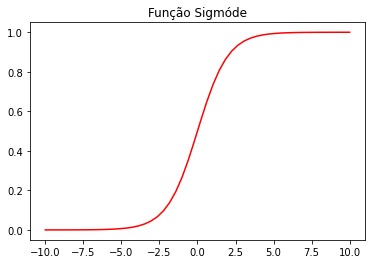

In [49]:
xlog = np.linspace(-10,10, 50)
plt.plot(xlog, 1 / (1 + np.exp(-xlog)) , color = 'red')
plt.title("Função Sigmóde")
plt.show()


Se possuímos mais de uma classe pra prever o modelo irá gerar valores 0 ou 1 para cada classe, onde na predição final para um caso apenas uma das classes terá o valor 1 enquanto as outras ficarão com 0. No caso 4 classes serão geradas 4 equações diferentes e a classe que mais se aproxima de 1 será a classe que o modelo retornará como previsão.

<h2>Avaliação de Desodorantes <h2>

Foi realizada uma pesquisa para avaliação de desodorantes onde o entrevistado responde se gostou ou não do produto com base em diversas qualidades listadas no questionario. Base de dados disponível em  https://www.kaggle.com/ramkumarr02/deodorant-instant-liking-data. <br>

In [50]:
df = pd.read_csv('Data_train_reduced.csv')

percen_faltantes = round((df.isnull().sum() / len(df['Instant.Liking']) )*100, 2)

tipos = df_desodorante.dtypes

In [51]:
# limpeza
df_desodorante = (df.drop(['q8.20', 'q8.18', 'q8.17', 'q8.8', 'q8.9', 'q8.10', 'q8.2', 'Respondent.ID', 'Product', 'q1_1.personal.opinion.of.this.Deodorant'], axis='columns')).copy()

df_desodorante['q8.12'].fillna(df_desodorante['q8.12'].median(), inplace= True ) 
df_desodorante['q8.7'].fillna(df_desodorante['q8.12'].median(), inplace= True ) 

In [52]:
perc_faltantes_new = round((df_desodorante.isnull().sum() / len(df_desodorante['Instant.Liking']) )*100, 2)

In [53]:
x_des = df_desodorante.drop(['Instant.Liking'], axis='columns')
y_des = df_desodorante['Instant.Liking']

In [54]:
# Modelagem

# Separando folds
str_kfold = StratifiedKFold(n_splits=5)

#Criando modelo
modelo_log = LogisticRegression()
resultado = cross_val_score(modelo_log, x_des, y_des, cv = str_kfold)

#Acurácia
print('Acurácia de', resultado.mean())

Acurácia de 0.752


É possível utilizar os métodos de regularização Lasso e Ridge na regressão logística assim como foi feita na regressão linear, ou seja, iremos ajustar os parâmetros L1 e $\lambda$ para localizar qual o melhor valor que otimiza nossa acurácia.

In [56]:
# Valores a serem testados
Val_C = np.array([0.01, 0.1, 0.5, 1, 2, 3, 5, 10, 20, 50, 100])
regul = ['l1' , 'l2']
val_grid = {'C': Val_C, 'penalty': regul}

#Criando modelo
modelo_log1 = LogisticRegression()

#Criando Grids
procura = GridSearchCV(estimator= modelo_log1, param_grid= val_grid,  cv = 5) # Essa função testa todas as combinações possíveis
procura.fit(x_des, y_des)

#Imprimindo a melhor acurácia
print("Melhor Acurácia:", procura.best_score_)
print("Parâmetro C:", procura.best_estimator_.C)
print("Regularização:", procura.best_estimator_.penalty)


Melhor Acurácia: 0.7528
Parâmetro C: 0.01
Regularização: l2


c:\Users\mathe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
55 fits failed out of a total of 110.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mathe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mathe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\mathe\AppData\Local\Programs\Pyt